In [17]:
# Jupyter magic extensions that makes our live easier
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
os.chdir('..')

In [3]:
import os
print(os.getcwd())

c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\notebooks


In [13]:
# Trying calling the evaluate functions outside any class model
from src.evaluation import confusion_matrix_plot, evaluate_report, roc_curve_plot
import pandas as pd
import numpy as np

# Fake data
fake_prob = np.linspace(0.1, 1, 10)

fake_test = np.array([0,0,1,1,0,0,1,1,1,1]) # 3 true 0, 4 true 1,  1 0 & 2 1 missclassified

fake_path = list(map('1110/'.__add__,['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']))
#fake_path = '1110' + ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

predictions = fake_prob > 0.5
# Create a dataframe with the predictions
df_preds = pd.DataFrame({"filepath": fake_path, "prediction": predictions})

# print
print("Predicciones:\n ", df_preds, "\n")

# Create a dataframe with the labels
df_labels = pd.DataFrame({"filepath": fake_path, "label": fake_test})

# print
print("Etiquetas:\n ", df_labels, "\n")

# Return the two dataframes
predict_dfs = {"preds": df_preds, "labels": df_labels}

report = evaluate_report.evaluate(predict_dfs["preds"], predict_dfs["labels"])

print("Resultado AUC: ", report["patient_aucs"], "\n")

Predicciones:
    filepath  prediction
0   1110/a       False
1   1110/b       False
2   1110/c       False
3   1110/d       False
4   1110/e       False
5   1110/f        True
6   1110/g        True
7   1110/h        True
8   1110/i        True
9   1110/j        True 

Etiquetas:
    filepath  label
0   1110/a      0
1   1110/b      0
2   1110/c      1
3   1110/d      1
4   1110/e      0
5   1110/f      0
6   1110/g      1
7   1110/h      1
8   1110/i      1
9   1110/j      1 

Resultado AUC:  {'1110': 0.7083333333333334} 



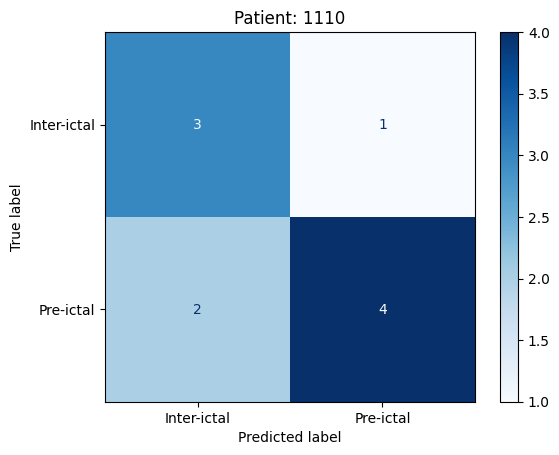

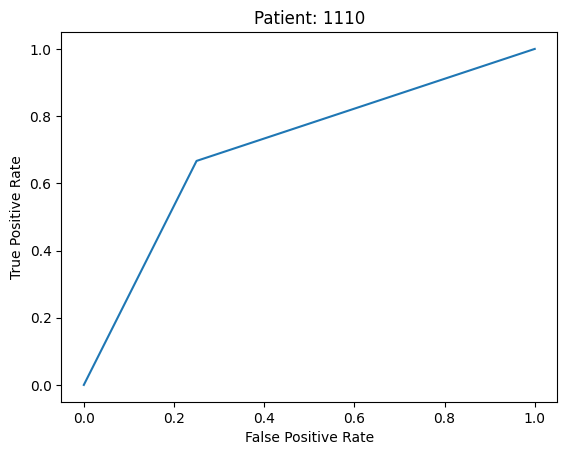

In [15]:
confusion_matrix_plot.confusion_matrix_plots(
predict_dfs["preds"], predict_dfs["labels"], normalize=None
)

roc_curve_plot.roc_curve_plots(predict_dfs["preds"], predict_dfs["labels"])

Calling data from patient 1110 ... 



c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.drop(columns=["patient", "folder"], inplace=True)
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["sum_next_5_labels"] = 0
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

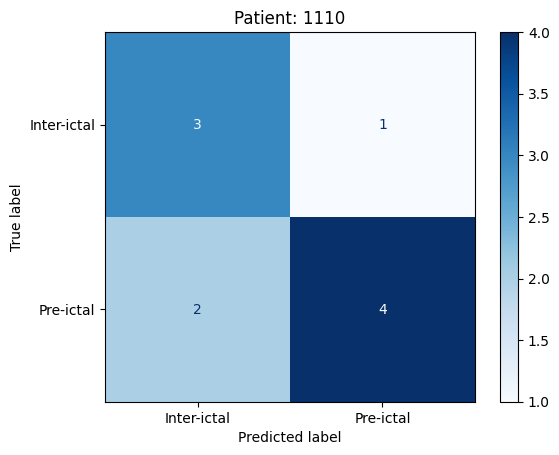

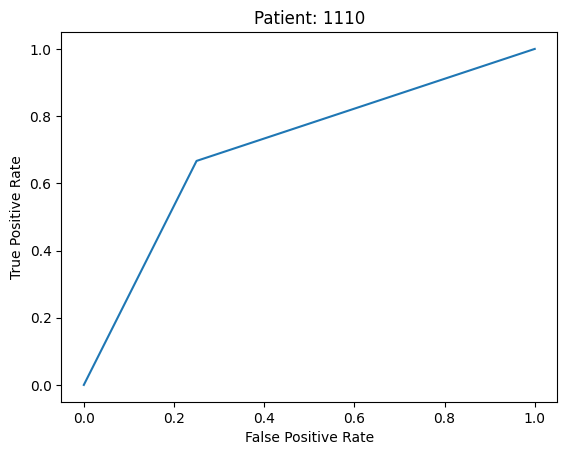

Resultado AUC:  {'1110': 0.7083333333333334} 



In [20]:
# Trying the FakeModel class
from src.models.train_pipeline import train_pipeline
from src.models.models import FakeModel
from src.data.make_dataset import PandasDatasetLoader

patient_id = '1110'

dataset_path = 'E:\\Epilepsy challenge\\' + str(patient_id) + '_train\\data\\parquet\\train'

_, results = train_pipeline(PandasDatasetLoader(dataset_path),FakeModel(), patient_id = patient_id, visualize=True, 
                                labels_prop = 1)

In [21]:
print(results['report'][patient_id])

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

